<a href="https://colab.research.google.com/github/SeptiLutfiana/MESIN-LEARNING/blob/main/Septi_Lutfiana_Pembelajaran_Mesin_Kuis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama: Septi Lutfiana
* NIM: 2141720038
* Kelas: 3H D-IV TI

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [ ]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## 1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Memisahkan fitur dan label
X = mnist.data
y = mnist.target

# Menghitung jumlah data untuk setiap label
label_counts = np.bincount(y.astype(int)) # mengetahui jumlah data pada setiap label

# Menampilkan jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count}")

Label 0: 6903
Label 1: 7877
Label 2: 6990
Label 3: 7141
Label 4: 6824
Label 5: 6313
Label 6: 6876
Label 7: 7293
Label 8: 6825
Label 9: 6958


### Penjelasan No. 1

Dengan melihat data di atas, kita dapat melihat bahwa jumlah data untuk setiap label angka cukup seimbang dalam dataset MNIST. Selisih jumlah data antara label angka terkecil (label 5 dengan 6313 data) dan terbesar (label 1 dengan 7877 data) tidak terlalu signifikan.

## 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

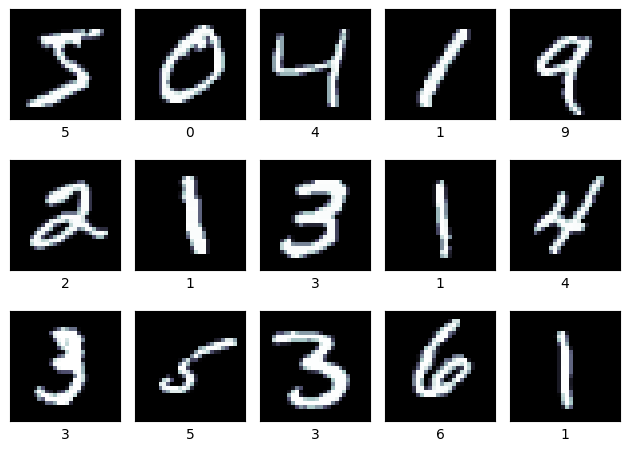

In [ ]:
# Menampilkan 15 citra pertama dari dataset MNIST
# Konversi X menjadi array NumPy
X = X.values
# atau bisa menggunakan X.iloc[i].values untuk mengakses nilai array dari DataFrame X pada setiap iterasi
# Menampilkan 15 citra pertama dari dataset MNIST
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    img = X[i].reshape(28, 28)  # Mengubah bentuk citra menjadi matriks 2D 28x28
    axi.imshow(img, cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=y[i])

plt.tight_layout()

## 3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

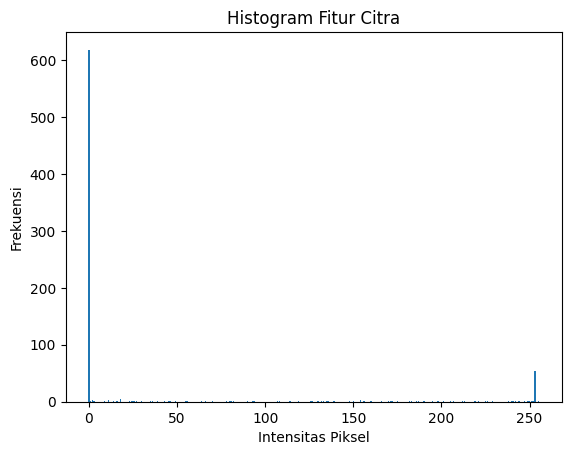

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mengambil contoh citra
sample_image_index = 0
sample_image = X[sample_image_index].reshape(28, 28)

# Menghitung histogram
hist, _ = np.histogram(sample_image, bins=256, range=[0, 255])

# Menampilkan histogram
plt.bar(range(256), hist)
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.title('Histogram Fitur Citra')
plt.show()

<ipython-input-12-25de7461bc12>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_features[:, 0], X_features[:, 1], cmap='viridis')


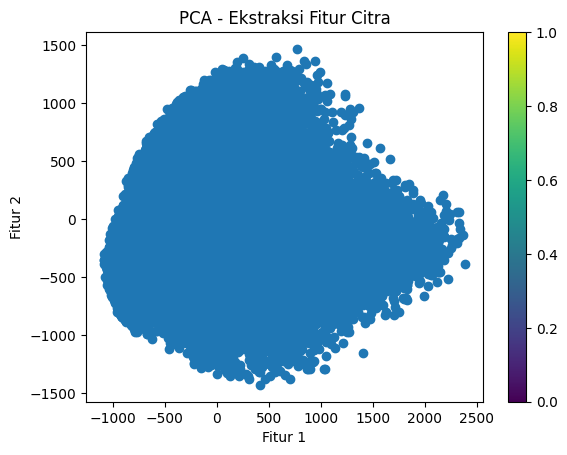

Contoh fitur setelah ekstraksi dengan PCA:
[ 122.25526033 -316.23384654  -51.13189082 -556.89808751  -49.20985256
 -217.06822947  233.70397644  188.81878291 -358.77870239  203.50629675
  210.11818831 -243.71301728  -57.75448849  765.18574827 -185.13229908
   -8.44219356]


In [ ]:
# Melakukan PCA untuk ekstraksi fitur
from sklearn.decomposition import PCA
pca = PCA(n_components=16) # semakin kecil n_componene maka kualiatas pixel jelek dan tidak jelas, jika semakin besar maka akan detail dalam penjelasannya.
X_features = pca.fit_transform(X)

# Contoh penggunaan fitur
sample_image_index = 0
sample_image_features = X_features[sample_image_index]
sample_image_label = int(y[sample_image_index])  # Mengonversi label citra menjadi tipe integer



plt.scatter(X_features[:, 0], X_features[:, 1], cmap='viridis')
plt.colorbar()
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('PCA - Ekstraksi Fitur Citra')
plt.show()

print("Contoh fitur setelah ekstraksi dengan PCA:")
print(sample_image_features)


## 4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data training dan data testing
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_features , y, test_size=0.3, random_state=42)  # Rasio 70:30
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_features , y, test_size=0.2, random_state=42)  # Rasio 80:20
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_features , y, test_size=0.1, random_state=42)  # Rasio 80:20

In [ ]:
# Menampilkan jumlah data setelah pembagian
print("Jumlah data training dan data testing dengan rasio 70:30")
print("Data training:", X_train_70.shape)
print("Data testing:", X_test_70.shape)

print("Jumlah data training dan data testing dengan rasio 80:20")
print("Data training:", X_train_80.shape)
print("Data testing:", X_test_80.shape)

print("Jumlah data training dan data testing dengan rasio 90:10")
print("Data training:", X_train_90.shape)
print("Data testing:", X_test_90.shape)


Jumlah data training dan data testing dengan rasio 70:30
Data training: (49000, 16)
Data testing: (21000, 16)
Jumlah data training dan data testing dengan rasio 80:20
Data training: (56000, 16)
Data testing: (14000, 16)
Jumlah data training dan data testing dengan rasio 90:10
Data training: (63000, 16)
Data testing: (7000, 16)


### nilai x bukan x_features ( nilai pca 16)



In [ ]:
# Menampilkan jumlah data setelah pembagian
print("Jumlah data training dan data testing dengan rasio 70:30")
print("Data training:", X_train_70.shape)
print("Data testing:", X_test_70.shape)

print("Jumlah data training dan data testing dengan rasio 80:20")
print("Data training:", X_train_80.shape)
print("Data testing:", X_test_80.shape)

print("Jumlah data training dan data testing dengan rasio 90:10")
print("Data training:", X_train_90.shape)
print("Data testing:", X_test_90.shape)


Jumlah data training dan data testing dengan rasio 70:30
Data training: (49000, 16)
Data testing: (21000, 16)
Jumlah data training dan data testing dengan rasio 80:20
Data training: (56000, 16)
Data testing: (14000, 16)
Jumlah data training dan data testing dengan rasio 90:10
Data training: (63000, 16)
Data testing: (7000, 16)


### 5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.

- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

### algoritma Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB
from sklearn.metrics import accuracy_score
# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train_70, y_train_70)

# Prediksi dengan data training
y_train_pred_gnb_70 = gnb.predict(X_train_70)

# Evaluasi akurasi training
acc_train_gnb_70 = accuracy_score(y_train_70, y_train_pred_gnb_70)

# Prediksi test data
y_test_pred_gnb_70 = gnb.predict(X_test_70)

# Evaluasi model dengan metric akurasi
acc_test_gnb_70 = accuracy_score(y_test_70, y_test_pred_gnb_70)

# Print hasil evaluasi
print(f'Hasil akurasi data train dengan n-component 16 Naive Bayes (Gaussian): {acc_train_gnb_70}')
print(f'Hasil akurasi data test dengan n-component 16 Naive Bayes (Gaussian): {acc_test_gnb_70}')

Hasil akurasi data train dengan n-component 16 Naive Bayes (Gaussian): 0.8197142857142857
Hasil akurasi data test dengan n-component 16 Naive Bayes (Gaussian): 0.8187619047619048


In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB
from sklearn.metrics import accuracy_score
# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train_80, y_train_80)

# Prediksi dengan data training
y_train_pred_gnb_80 = gnb.predict(X_train_80)

# Evaluasi akurasi training
acc_train_gnb_80 = accuracy_score(y_train_80, y_train_pred_gnb_80)

# Prediksi test data
y_test_pred_gnb_80 = gnb.predict(X_test_80)

# Evaluasi model dengan metric akurasi
acc_test_gnb_80 = accuracy_score(y_test_80, y_test_pred_gnb_80)

# Print hasil evaluasi
print(f'Hasil akurasi data train dengan n-component 16 (Gaussian): {acc_train_gnb_80}')
print(f'Hasil akurasi data test dengan n-component 16 (Gaussian): {acc_test_gnb_80}')

Hasil akurasi data train dengan n-component 16 (Gaussian): 0.8193214285714285
Hasil akurasi data test dengan n-component 16 (Gaussian): 0.821


In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train_90, y_train_90)

# Prediksi dengan data training
y_train_pred_gnb_90 = gnb.predict(X_train_90)

# Evaluasi akurasi training
acc_train_gnb_90 = accuracy_score(y_train_90, y_train_pred_gnb_90)

# Prediksi test data
y_test_pred_gnb_90 = gnb.predict(X_test_90)

# Evaluasi model dengan metric akurasi
acc_test_gnb_90 = accuracy_score(y_test_90, y_test_pred_gnb_90)

# Print hasil evaluasi
print(f'Hasil akurasi data train dengan n-component 16 (Gaussian): {acc_train_gnb_90}')
print(f'Hasil akurasi data test dengan n-component 16 (Gaussian): {acc_test_gnb_90}')

Hasil akurasi data train dengan n-component 16 (Gaussian): 0.819984126984127
Hasil akurasi data test dengan n-component 16 (Gaussian): 0.8194285714285714


### SVM ngan rasio 80:20

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model SVM dengan kernel RBF
svm_rbf_model = SVC(kernel='rbf', C=1.0)

# Latih model SVM pada data training
svm_rbf_model.fit(X_train_80, y_train_80)

# Prediksi label untuk data training dan data testing
y_train_pred_svm = svm_rbf_model.predict(X_train_80)
y_test_pred_svm = svm_rbf_model.predict(X_test_80)

# Evaluasi performa model SVM
accuracy_train_svm = accuracy_score(y_train_80, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test_80, y_test_pred_svm)

print("Akurasi SVM pada Data Training:", accuracy_train_svm)
print("Akurasi SVM pada Data Testing:", accuracy_test_svm)

Akurasi SVM pada Data Training: 0.976375
Akurasi SVM pada Data Testing: 0.9680714285714286


Nilai akurasi yang di berikan menunjukkan bahwa model SVM dengan kernel RBF yang dilatih pada data training yang telah di-PCA memiliki tingkat akurasi yang tinggi.

Dengan akurasi sebesar 97,6% pada data training, model memiliki kemampuan yang sangat baik dalam mengklasifikasikan data training yang telah di-PCA. Hal ini menunjukkan bahwa model mampu dengan akurat mempelajari pola-pola yang ada dalam data training dan menggeneralisasikannya dengan baik.

dengan akurasi sebesar 97,6% pada data testing, model juga memiliki tingkat akurasi yang tinggi saat diterapkan pada data yang tidak digunakan dalam proses pelatihan. Ini menunjukkan bahwa model mampu secara efektif menggeneralisasikan pengetahuannya ke data baru yang belum pernah dilihat sebelumnya.

Dengan demikian, hasil tersebut menunjukkan bahwa model SVM dengan kernel RBF dan PCA telah berhasil dalam melakukan klasifikasi dengan tingkat akurasi yang tinggi pada data training dan data testing.

### SVM Rasio 70-30

In [ ]:

# Inisialisasi model SVM dengan kernel RBF
svm_rbf_model = SVC(kernel='rbf', C=1.0)

# Latih model SVM pada data training
svm_rbf_model.fit(X_train_70, y_train_70)

# Prediksi label untuk data training dan data testing
y_train_pred_svm = svm_rbf_model.predict(X_train_70)
y_test_pred_svm = svm_rbf_model.predict(X_test_70)

# Evaluasi performa model SVM
accuracy_train_svm = accuracy_score(y_train_70, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test_70, y_test_pred_svm)

print("Akurasi SVM pada Data Training:", accuracy_train_svm)
print("Akurasi SVM pada Data Testing:", accuracy_test_svm)

Akurasi SVM pada Data Training: 0.9755918367346939
Akurasi SVM pada Data Testing: 0.9678095238095238


Nilai akurasi yang di berikan menunjukkan bahwa model SVM dengan kernel RBF yang dilatih pada data training yang telah di-PCA memiliki tingkat akurasi yang tinggi.

Dengan akurasi sebesar 97,5% pada data training, model memiliki kemampuan yang sangat baik dalam mengklasifikasikan data training yang telah di-PCA. Hal ini menunjukkan bahwa model mampu dengan akurat mempelajari pola-pola yang ada dalam data training dan menggeneralisasikannya dengan baik.

dengan akurasi sebesar 96,7% pada data testing, model juga memiliki tingkat akurasi yang tinggi saat diterapkan pada data yang tidak digunakan dalam proses pelatihan. Ini menunjukkan bahwa model mampu secara efektif menggeneralisasikan pengetahuannya ke data baru yang belum pernah dilihat sebelumnya.

Dengan demikian, hasil tersebut menunjukkan bahwa model SVM dengan kernel RBF dan PCA telah berhasil dalam melakukan klasifikasi dengan tingkat akurasi yang tinggi pada data training dan data testing.

### SVM Rasio 90-10

In [ ]:
# Inisialisasi model SVM dengan kernel RBF
svm_rbf_model = SVC(kernel='rbf', C=1.0)

# Latih model SVM pada data training
svm_rbf_model.fit(X_train_90, y_train_90)

# Prediksi label untuk data training dan data testing
y_train_pred_svm = svm_rbf_model.predict(X_train_90)
y_test_pred_svm = svm_rbf_model.predict(X_test_90)

# Evaluasi performa model SVM
accuracy_train_svm = accuracy_score(y_train_90, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test_90, y_test_pred_svm)

print("Akurasi SVM pada Data Training:", accuracy_train_svm)
print("Akurasi SVM pada Data Testing:", accuracy_test_svm)

Akurasi SVM pada Data Training: 0.976920634920635
Akurasi SVM pada Data Testing: 0.9667142857142857


Nilai akurasi yang di berikan menunjukkan bahwa model SVM dengan kernel RBF yang dilatih pada data training yang telah di-PCA memiliki tingkat akurasi yang tinggi.

Dengan akurasi sebesar 976% pada data training, model memiliki kemampuan yang sangat baik dalam mengklasifikasikan data training yang telah di-PCA. Hal ini menunjukkan bahwa model mampu dengan akurat mempelajari pola-pola yang ada dalam data training dan menggeneralisasikannya dengan baik.

dengan akurasi sebesar 96,6% pada data testing, model juga memiliki tingkat akurasi yang tinggi saat diterapkan pada data yang tidak digunakan dalam proses pelatihan. Ini menunjukkan bahwa model mampu secara efektif menggeneralisasikan pengetahuannya ke data baru yang belum pernah dilihat sebelumnya.

Dengan demikian, hasil tersebut menunjukkan bahwa model SVM dengan kernel RBF dan PCA telah berhasil dalam melakukan klasifikasi dengan tingkat akurasi yang tinggi pada data training dan data testing.

## 6. Evaluasi model yang Anda buat terhadap data training dan data testing.

* Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
* Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
* Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.



* Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.

###  algoritma Naive Bayes (Gaussian) dan SVM  dengan rasio 70:30

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print accuracy
print("Naive Bayes Accuracy:")
print("Training Accuracy:", acc_train_gnb_70)
print("Testing Accuracy:", acc_test_gnb_70)
print()
print("SVM Accuracy:")
print("Training Accuracy:", accuracy_train_svm)
print("Testing Accuracy:", accuracy_test_svm)
print()

y_test_70 = y_test_70[:7000] # menyesuaikan jumlah data, jika lebih maka akan eror
# Classification report for Naive Bayes model
nb_report = classification_report(y_test_70, y_test_pred_gnb_70)
print("Naive Bayes Classification Report:")
print(nb_report)
print()

# Classification report for SVM model
svm_report = classification_report(y_test_70, y_test_pred_svm)
print("SVM Classification Report:")
print(svm_report)
print()

# Confusion matrix for Naive Bayes model
nb_confusion = confusion_matrix(y_test_70, y_test_pred_gnb_90)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion)
print()

# Confusion matrix for SVM model
svm_confusion = confusion_matrix(y_test_70, y_test_pred_svm)
print("SVM Confusion Matrix:")
print(svm_confusion)
print()

Naive Bayes Accuracy:
Training Accuracy: 0.8197142857142857
Testing Accuracy: 0.8187619047619048

SVM Accuracy:
Training Accuracy: 0.976920634920635
Testing Accuracy: 0.9667142857142857



ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print accuracy
print("Naive Bayes Accuracy:")
print("Training Accuracy:", acc_train_gnb_90)
print("Testing Accuracy:", acc_test_gnb_90)
print()
print("SVM Accuracy:")
print("Training Accuracy:", accuracy_train_svm)
print("Testing Accuracy:", accuracy_test_svm)
print()

# Classification report for Naive Bayes model
nb_report = classification_report(y_test_90, y_test_pred_gnb_90)
print("Naive Bayes Classification Report:")
print(nb_report)
print()

# Classification report for SVM model
svm_report = classification_report(y_test_90, y_test_pred_svm)
print("SVM Classification Report:")
print(svm_report)
print()

# Confusion matrix for Naive Bayes model
nb_confusion = confusion_matrix(y_test_90, y_test_pred_gnb_90)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion)
print()

# Confusion matrix for SVM model
svm_confusion = confusion_matrix(y_test_90, y_test_pred_svm)
print("SVM Confusion Matrix:")
print(svm_confusion)
print()

Naive Bayes Accuracy:
Training Accuracy: 0.819984126984127
Testing Accuracy: 0.8194285714285714

SVM Accuracy:
Training Accuracy: 0.976920634920635
Testing Accuracy: 0.9667142857142857

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       683
           1       0.87      0.94      0.90       800
           2       0.83      0.78      0.81       674
           3       0.78      0.77      0.77       760
           4       0.82      0.80      0.81       611
           5       0.65      0.78      0.71       658
           6       0.87      0.84      0.86       677
           7       0.90      0.85      0.87       724
           8       0.83      0.75      0.79       693
           9       0.76      0.76      0.76       720

    accuracy                           0.82      7000
   macro avg       0.82      0.82      0.82      7000
weighted avg       0.82      0.82      0.82      7000


SVM Classification 

#### algoritma Naive Bayes (Gaussian) dan SVM  dengan rasio 80:20

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print accuracy
print("Naive Bayes Accuracy:")
print("Training Accuracy:", acc_train_gnb_80)
print("Testing Accuracy:", acc_test_gnb_80)
print()
print("SVM Accuracy:")
print("Training Accuracy:", accuracy_train_svm)
print("Testing Accuracy:", accuracy_test_svm)
print()

# Classification report for Naive Bayes model
nb_report = classification_report(y_test_80, y_test_pred_gnb_80)
print("Naive Bayes Classification Report:")
print(nb_report)
print()

# Classification report for SVM model
svm_report = classification_report(y_test_80, y_test_pred_svm)
print("SVM Classification Report:")
print(svm_report)
print()

# Confusion matrix for Naive Bayes model
nb_confusion = confusion_matrix(y_test_80, y_test_pred_gnb_80)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion)
print()

# Confusion matrix for SVM model
svm_confusion = confusion_matrix(y_test_80, y_test_pred_svm)
print("SVM Confusion Matrix:")
print(svm_confusion)
print()

Naive Bayes Accuracy:
Training Accuracy: 0.8193214285714285
Testing Accuracy: 0.821

SVM Accuracy:
Training Accuracy: 0.976375
Testing Accuracy: 0.9680714285714286

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1343
           1       0.88      0.93      0.90      1600
           2       0.84      0.80      0.82      1380
           3       0.77      0.77      0.77      1433
           4       0.82      0.80      0.81      1295
           5       0.66      0.77      0.71      1273
           6       0.88      0.86      0.87      1396
           7       0.89      0.85      0.87      1503
           8       0.82      0.76      0.79      1357
           9       0.74      0.76      0.75      1420

    accuracy                           0.82     14000
   macro avg       0.82      0.82      0.82     14000
weighted avg       0.82      0.82      0.82     14000


SVM Classification Report:
             

### 7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

KeyError: ignored

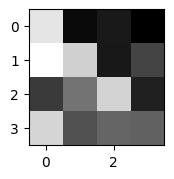

In [ ]:
import matplotlib.pyplot as plt

# Menampilkan 15 citra pertama dari data testing berserta hasil pelabelannya
plt.figure(figsize=(12, 6))
for i in range(40):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test_90[i].reshape(4, 4), cmap='gray')  # Menggunakan X_test_70[i] dan reshape citra menjadi (28, 28)
    plt.title(f"True: {y_test_90[i]}\nPred: { y_test_pred_gnb_90[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!




Disini memilih menggunakan model
- algoritma Naive Bayes (Gaussian) dengan rasio 70:30 n-component 16
  
   ### nilai konfigurasinya:

   data train dengan n-component 16 Naive Bayes (Gaussian): 81.9%

   data test dengan n-component 16 Naive Bayes (Gaussian): 81.8%

   ### tingkat akurasi data training dan data testing:

   Hasil akurasi data train dengan n-component 16 Naive Bayes (Gaussian): 0.8197142857142857
   
   Hasil akurasi data test dengan n-component 16 Naive Bayes (Gaussian): 0.8187619047619048

   ---
- algoritma Naive Bayes (Gaussian) dengan rasio 80:40 n-component 16
  
   ### nilai konfigurasinya:

   data train dengan n-component 16 Naive Bayes (Gaussian): 81.9%

   data test dengan n-component 16 Naive Bayes (Gaussian): 82.1%

   ### tingkat akurasi data training dan data testing:

  Hasil akurasi data train dengan n-component 16 (Gaussian): 0.8193214285714285
  
  Hasil akurasi data test dengan n-component 16 (Gaussian): 0.821

   ---
- algoritma Naive Bayes (Gaussian) dengan rasio 90:10 n-component 16

   ### nilai konfigurasinya:

  data train dengan n-component 16 Naive Bayes (Gaussian): 81.9%

   data test dengan n-component 16 Naive Bayes (Gaussian): 81.8%

   ### tingkat akurasi data training dan data testing:

  Hasil akurasi data train dengan n-component 16 (Gaussian): 0.819984126984127
  
  Hasil akurasi data test dengan n-component 16 (Gaussian): 0.8194285714285714
   
   ---
- SVM dengan menggunakan n-component 16 dengan rasio asio 70:30

   ### nilai konfigurasinya:

  data train dengan n-component 16 Naive Bayes (Gaussian): 97.5%

   data test dengan n-component 16 Naive Bayes (Gaussian): 86.7%

   ### tingkat akurasi data training dan data testing:

   Akurasi SVM pada Data Training: 0.9755918367346939
   
   Akurasi SVM pada Data Testing: 0.9678095238095238
   
   ---
- SVM dengan menggunakan n-component 16 dengan rasio asio 80:20

   ### nilai konfigurasinya:

  data train dengan n-component 16 Naive Bayes (Gaussian): 97.6%

   data test dengan n-component 16 Naive Bayes (Gaussian): 96.8%
   ### tingkat akurasi data training dan data testing:

   Akurasi SVM pada Data Training: 0.976375
   
   Akurasi SVM pada Data Testing: 0.9680714285714286
   
   ---
- SVM dengan menggunakan n-component 16 dengan rasio asio 90:10

   ### nilai konfigurasinya:

   data train dengan n-component 16 Naive Bayes (Gaussian): 97.6%

   data test dengan n-component 16 Naive Bayes (Gaussian): 96.6%

   ### tingkat akurasi data training dan data testing:

   Training Accuracy: 0.976920634920635
   
   Testing Accuracy: 0.9667142857142857
   
   ---

   ### Kesimpulan

   dari hasil percobaan tersebut model yang tingkat konfigurasi dan akurasi bagus ialah menggunakan model SVM dengan n-component 16 dan rasio pembagian 80:30.